In [1]:
# Import necessary libraries
import tensorflow as tf
import keras as keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import seaborn as sns 


In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Reshape the input data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_test .shape

(10000, 28, 28, 1)

In [6]:
# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [9]:
#plt.figure(figsize =(10,10))
#for i in range (25):
    #plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid('off')
    #plt.imshow(x_train[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[x_test[i]])

In [8]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\junos\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
model.fit(x_train, y_train, epochs=6, batch_size=128)

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6880 - loss: 0.8663
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8624 - loss: 0.3800
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8833 - loss: 0.3187
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8982 - loss: 0.2805
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9048 - loss: 0.2579
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9104 - loss: 0.2426


In [12]:
# Make predictions for two images
predictions = model.predict(x_test[:2])

# Print the predictions
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[7.41380109e-06 1.12456306e-07 9.35188746e-06 1.86131402e-07
  4.76167003e-07 1.13518909e-03 2.16385573e-07 2.01691245e-03
  2.09149875e-05 9.96809185e-01]
 [6.65623229e-05 1.28178146e-09 9.99827087e-01 2.29979582e-06
  4.91094079e-06 1.24125616e-08 9.90686603e-05 2.63953529e-11
  9.01900208e-08 9.99554643e-08]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


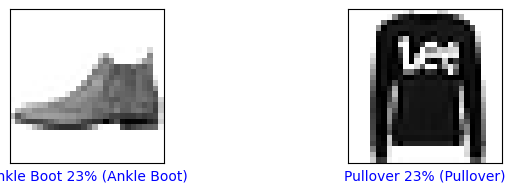

In [13]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Function to plot the image and the predicted label
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

# Plot the first two images with predictions
num_rows = 1
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.show()